# Data access

So far in this course we have mainly been downloading data from OneDrive links provided by the instructor. But for our final projects, we will have to search for and download data independently. Finding, downloading, and cleaning data is an important, but laborious, part of geospatial data science. In this demo, we will learn how to **download data programmatically**. There are two good reasons for downloading data in this way:

1) It is **automated**, meaning that it is both faster and more accurate than pointing and clicking

2) It **links** the data access **to** our data analysis, meaning that we can make our analysis more **reproducible** (for ourselves **and** others!)

we will mainly learn about downloading data using **Application Programming Interfaces (APIs)**. We will also talk about options for downloading data when an API is unavailable or insufficient.

## APIs

Most organizations responsible for collecting, organizing, and storing data have a **public API** that we can use. An API is a type of software that provides a **standard set of protocols/functions** so that our computer can **communicate** with other computers (in contrast, a **user interface** is a type of software that connects a **computer** to a **person**). A **web API** is an API that allows our computer to communicate with other computers **over the internet**, typically using HTTPS.

```{image} images/api.svg
:width: 800px
:align: center
```

### API request

There are two key componets of an API: a **request** and a **response**. 

* We first send a **request** to a data source (i.e. **endpoint**). The request typically looks like a URL that we would type into a web browser except it contains sets of parameters that specify the type and particular subset of data that we are interested in.

* The endpoint will then return a **response** code plus the data we asked for. Perhaps the most familiar response is the **"404 Not Found"** which is an HTTP status code that indicates the server could not find the requested resource. 

### RESTful web APIs

There are many different types of web APIs but one the most common types is a `REST` or `RESTful`. A RESTful API is a web API that uses URL arguments to specify what information we want returned through the API.

To put this all into perspective, next, you will explore a RESTful API interface example. For these kind of tasks, we have to carefully inspect the API **documentation** to understand what functions are available and what keyword arguments they require.

## Official data from the state of North Carolina 

North Carolina has a service called **Log Into North Carolina (LINC)** which is an interactive data retrieval service containing historical information for over 900 data items and a variety of geographic areas within the state. Topics include: population, labor force, education, transportation, revenue, agriculture, vital statistics, energy and utilities, for a variety of geographic areas within the state.

```{image} images/link.png
:width: 300px
:align: center
```

The **LINC API** is organized around REST can be accessed from the following link `https://linc.osbm.nc.gov/api/explore/v2.1/`. The homepage provides a list of **requests** that can be used for querying and accessing data.

```{image} images/linc-catalog.png
:width: 700px
:align: center
```

```{image} images/linc-dataset.png
:width: 700px
:align: center
```

The API has a request that allows us to export the dataset as a csv file. We can do this using the Python package called `requests`. 

We will start by downloading the **monthly labor force** dataset.

```{image} images/labor-force.png
:width: 700px
:align: center
```

In [1]:
import requests
import pandas as pd
from io import StringIO
import numpy as np

# Define base URL
base_url = 'https://linc.osbm.nc.gov/api/explore/v2.1/catalog/datasets/'

# Define dataset
dataset = 'monthly-labor-force-linc/'

# Define request
request = 'exports/csv'

In [2]:
# Make a request
url = base_url + dataset + request
response = requests.get(url)
response

<Response [200]>

In [3]:
# Load into pandas
df = pd.read_csv(StringIO(response.text), sep=';')
df.head()

,area_name,area_type,year,month,variable,value,date
0,Gates County,County,2013,4,Monthly Unemployment (Place of Residence),328.0,2013-04
1,Transylvania County,County,2014,12,Monthly Employment (Place of Residence),11175.0,2014-12
2,Jones County,County,2015,7,Monthly Labor Force (Place of Residence),4665.0,2015-07
3,Orange County,County,2015,7,Monthly Unemployment Rate (Place of Residence)...,5.2,2015-07
4,Franklin County,County,2010,3,Monthly Unemployment (Place of Residence),2980.0,2010-03


In [4]:
# Find unique variables
np.unique(df.variable)

array(['Monthly Employment (Place of Residence)',
       'Monthly Labor Force (Place of Residence)',
       'Monthly Unemployment (Place of Residence)',
       'Monthly Unemployment Rate (Place of Residence)(Percent)'],
      dtype=object)

In [5]:
# Filter by specific variable
unemployment = df[df['variable'] == 'Monthly Unemployment Rate (Place of Residence)(Percent)']
unemployment.head()

,area_name,area_type,year,month,variable,value,date
3,Orange County,County,2015,7,Monthly Unemployment Rate (Place of Residence)...,5.2,2015-07
5,Gaston County,County,2010,3,Monthly Unemployment Rate (Place of Residence)...,13.4,2010-03
6,Madison County,County,2010,3,Monthly Unemployment Rate (Place of Residence)...,10.6,2010-03
9,New Hanover County,County,2014,10,Monthly Unemployment Rate (Place of Residence)...,5.2,2014-10
14,Onslow County,County,2013,5,Monthly Unemployment Rate (Place of Residence)...,8.5,2013-05


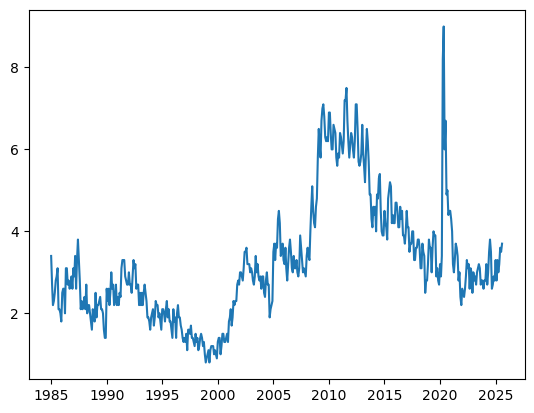

In [6]:
# Find unemployment statistics for Orange County, NC
orange_county = unemployment[unemployment['area_name'] == 'Orange County']

# Plot
dates = pd.to_datetime(orange_county['date'], format="%Y-%m")
orange_county.index = dates
orange_county = orange_county.sort_index()

import matplotlib.pyplot as plt
plt.plot(orange_county['value'])

## URL Parameters

We can use **URL parameters** to define more specific requests which can be useful for limiting the data we receive from the response. For example, we an query the data to only return data for Durham County using the RESTful call `where`.

In [7]:
# Define new request
durham_url = url + "?where=area_name='Durham County'"
durham_url = durham_url.replace(" ", "%20")
response = requests.get(durham_url)

# Convert to DataFrame
durham_df = pd.read_csv(StringIO(response.text), sep=';')
durham_df.head()

,area_name,area_type,year,month,variable,value,date
0,Durham County,County,2018,6,Monthly Labor Force (Place of Residence),169439.0,2018-06
1,Durham County,County,2006,8,Monthly Employment (Place of Residence),130964.0,2006-08
2,Durham County,County,2020,2,Monthly Unemployment (Place of Residence),5448.0,2020-02
3,Durham County,County,2006,1,Monthly Unemployment Rate (Place of Residence)...,3.8,2006-01
4,Durham County,County,2009,2,Monthly Employment (Place of Residence),128301.0,2009-02


## Census Bureau data

The Census Bureau also has an API for accessing data. 

```{image} images/census-api.png
:width: 800px
:align: center
```

We start with defining the host name and dataset that we are interested in.

```{note}
The American Community Survey (ACS) is a continuous, nationwide survey conducted by the Census Bureau that collects information **every year**.
```

In [8]:
# Define base URL for American Community Survey in 2023)
base_url = "https://api.census.gov/data/2023/acs/acs1"

Next we add `get` to our query, followed by `NAME,` and the variables we are interested in.

```{note}
**B01003_001E** is just total population variable.
```

In [9]:
query = 'get=NAME,B01003_001E'

We then define our places of interest, noting that the wildcard (`*`) indicates **all values**. Here we define all counties in North Carolina which has a **Federal Information Processing Standards (FIPS) code = 37**. We also define our API key.

In [10]:
place = 'for=county:*&in=state:37'
key = 'key=5f7e25f1ce5f52828e64cc4e5ff5f470759b4e03'

url = base_url + '?' + query + '&' + place + '&' + key
print(url)

https://api.census.gov/data/2023/acs/acs1?get=NAME,B01003_001E&for=county:*&in=state:37&key=5f7e25f1ce5f52828e64cc4e5ff5f470759b4e03


We can then send our request and convert the returned data to a DataFrame. 

In [11]:
# Send request
response = requests.get(url)

# Convert to DataFrame
df = pd.DataFrame(response.json()[1:], columns=data[0])
df["B01003_001E"] = pd.to_numeric(df["B01003_001E"])
df.head()

NameError: name 'data' is not defined

## API wrappers

It can sometimes be difficult to manually construct HTTP requests. To overcome this, some APIs have **wrappers** which are a software packages that simplify interactions with an API. 

We have used an API wrapper already for Census Bureau data called `census`. Conveniently, it returns the data in **`Pandas` Dataframes** for further analysis. 

The **GitHub repository** is usually the best place to learn about how to use a specific wrapper (or general software package).

```{image} images/census-github.png
:width: 1000px
:align: center
```

First we should find how to install it, usually either through `conda` or `pip`. 

```{image} images/census-install.png
:width: 800px
:align: center
```

In [83]:
# Import package
from census import Census

Then search the documentation for examples...

```{image} images/census-examples.png
:width: 1000px
:align: center
```

In [84]:
c = Census("5f7e25f1ce5f52828e64cc4e5ff5f470759b4e03")
c.acs5.state(('NAME', 'B25034_010E'), '37')

[{'NAME': 'North Carolina', 'B25034_010E': 152740.0, 'state': '37'}]

```{image} images/more-examples.png
:width: 1000px
:align: center
```

## Hydrological data from USGS

Let's have a look at one last API wrapper called [`dataretrieval`](https://github.com/DOI-USGS/dataretrieval-python) which was developed by USGS to retrieve hydrologic data from the **USGS National Water Information System (NWIS)**.

```{image} images/usgs-github.png
:width: 1000px
:align: center
```

Again, the documentation makes it clear that we should install it using either `conda` or `pip`. 

```{image} images/usgs-install.png
:width: 800px
:align: center
```

In [85]:
%%capture
!pip install -U dataretrieval

Now we can look through the documentation to see if the examples function as expected.

```{image} images/usgs.png
:width: 1000px
:align: center
```

In [86]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# Specify the USGS site code
site = '03339000'

# Get instantaneous values (iv)
df = nwis.get_record(sites=site, service='dv', start='2020-10-01', end='2021-09-30')
df.head()

,site_no,00010_ysi_Mean,00010_ysi_Mean_cd,00060_Mean,00060_Mean_cd,00065_Mean,00065_Mean_cd,00095_Mean,00095_Mean_cd,00300_Minimum,...,63680_hach-solitax_Mean,63680_hach-solitax_Mean_cd,63680_ysi_Mean,63680_ysi_Mean_cd,99133_Maximum,99133_Maximum_cd,99133_Minimum,99133_Minimum_cd,99133_Mean,99133_Mean_cd
datetime,,,,,,,,,,,,,,,,,,,,,
2020-10-01 00:00:00+00:00,03339000,14.9,A,75.7,A,2.04,A,672.0,A,8.9,...,5.5,A,3.7,A,4.1,A,3.3,A,3.7,A
2020-10-02 00:00:00+00:00,03339000,14.5,A,66.0,A,1.99,A,678.0,A,9.2,...,5.4,A,3.6,A,4.2,A,3.8,A,4.1,A
2020-10-03 00:00:00+00:00,03339000,14.2,A,60.2,A,1.96,A,678.0,A,9.4,...,4.9,A,3.2,A,3.8,A,3.0,A,3.4,A
2020-10-04 00:00:00+00:00,03339000,14.4,A,68.8,A,2.01,A,705.0,A,9.1,...,4.7,A,3.3,A,3.0,A,2.6,A,2.8,A
2020-10-05 00:00:00+00:00,03339000,13.4,A,66.8,A,1.99,A,718.0,A,9.6,...,4.4,A,3.1,A,3.4,A,2.7,A,3.0,A


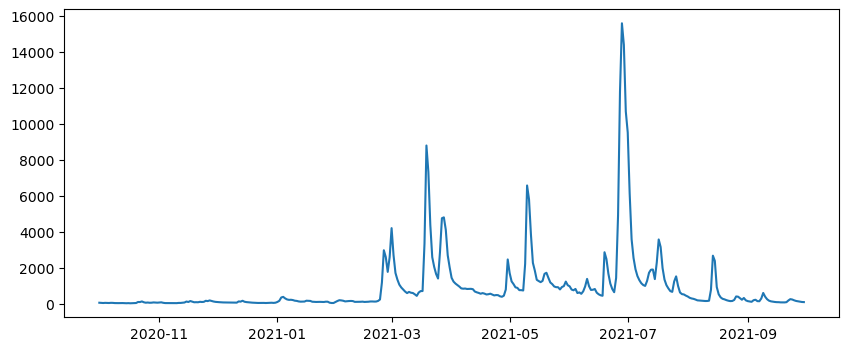

In [87]:
# Plot
f, ax = plt.subplots(1, 1, figsize=(10,4))
ax.plot(df['00060_Mean'])

## Tips for APIs

* Take a minute to familiarize yourself with the syntax for API calls using official website


* Be aware that API wrappers are often easier to use, just make sure that the wrapper is up-to-date (e.g. last commit in GitHub)


* Read the `docs`, `demos`, `examples` to find what we're looking for (sometimes they are not that comprehensive)


* If you can't find what you're looking for, inspect the source code (`.py` files)

## Climate and satellite data

Data from climate models and satellite remote sensing can also be downloaded programmatically. These datasets usually have large file sizes so its not advisable to download climate and satellite data locally. Instead there are several **catalogs** that host the data in the cloud. Examples include:

* [Google's Earth Engine Data Catalog](https://developers.google.com/earth-engine/datasets)

* [AWS Earth Search](https://element84.com/earth-search/)

* [Microsoft's Planetary Computer](https://planetarycomputer.microsoft.com/)

All three of these catalogs are now published as **SpatioTemporal Asset Catalogs (STAC)** which is open metadata standard that provides a **common structure** for describing geospatial information, so it can more easily be worked with, indexed, and discovered. 

We can query STAC catalogs using the `pystac-client` Python package.

In [31]:
%%capture
!pip install pystac-client

In [ ]:
from pystac_client import Client

In this demo, we will search for satellite imagery using Microsoft's Planetary Computer. 

```{image} images/mpc.png
:width: 800px
:align: center
```

In [32]:
%%capture
pip install planetary-computer

We can import `planetary_computer` as a package. Since actual data assets are in **private** Azure Blob Storage containers, we use the `modifier=planetary_computer.sign_inplace` to automatically generate a token granting access to the file is included in the URL.

In [33]:
import planetary_computer, requests

catalog = Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

## Search catalog

A list of collections in the catalog can be found at [https://planetarycomputer.microsoft.com/catalog](https://planetarycomputer.microsoft.com/catalog). In this demo, we will be produce a nice image of Store Glacier, Greenland in 2025 using Landsat imagery.

```{image} images/landsat-collection.png
:width: 800px
:align: center
```

We can search the catalog using spatial information (e.g. a point of bounding box) and/or dates. We find that 76 images match our search criteria. 

```{note}
The `items` objects contain the image metadata as GeoJSON features so it can easily be converted to a DataFrame.
```

In [59]:
# Define point of interest
from shapely.geometry import Point
point = Point(-50.57,70.40)
time_range = "2025-05-01/2025-08-31"

search = catalog.search(collections=["landsat-c2-l2"], intersects=point, datetime=time_range)
items = search.item_collection()
len(items)

76

In [81]:
import geopandas as gpd
df = gpd.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")
df.head()

,geometry,gsd,created,sci:doi,datetime,platform,proj:shape,description,instruments,eo:cloud_cover,...,landsat:scene_id,landsat:wrs_path,landsat:wrs_type,view:sun_azimuth,landsat:correction,view:sun_elevation,landsat:cloud_cover_land,landsat:collection_number,landsat:collection_category,proj:code
0,"POLYGON ((-53.25933 72.07025, -55.53393 70.484...",30,2025-09-03T09:19:49.891054Z,10.5066/P9OGBGM6,2025-08-31T15:18:53.992896Z,landsat-9,"[8771, 8741]",Landsat Collection 2 Level-2,"[oli, tirs]",99.30,...,LC90120102025243LGN00,012,2,177.300261,L2SP,27.452730,100.00,02,T2,EPSG:32622
1,"POLYGON ((-50.54113 70.74943, -52.5527 69.1447...",30,2025-09-04T09:20:01.419954Z,10.5066/P9OGBGM6,2025-08-26T15:00:43.927501Z,landsat-9,"[8561, 8521]",Landsat Collection 2 Level-2,"[oli, tirs]",62.78,...,LC90090112025238LGN00,009,2,174.738517,L2SP,30.492094,67.76,02,T1,EPSG:32622
2,"POLYGON ((-52.06021 70.7526, -54.07254 69.1477...",30,2025-09-05T09:25:17.621826Z,10.5066/P9OGBGM6,2025-08-25T15:06:50.457317Z,landsat-8,"[8641, 8591]",Landsat Collection 2 Level-2,"[oli, tirs]",72.40,...,LC80100112025237LGN00,010,2,174.666137,L2SP,30.837089,72.12,02,T1,EPSG:32622
3,"POLYGON ((-50.12952 72.07276, -52.40935 70.487...",30,2025-09-05T09:25:15.555221Z,10.5066/P9OGBGM6,2025-08-25T15:06:26.562040Z,landsat-8,"[8631, 8591]",Landsat Collection 2 Level-2,"[oli, tirs]",48.42,...,LC80100102025237LGN00,010,2,176.775680,L2SP,29.575889,51.28,02,T1,EPSG:32622
4,"POLYGON ((-51.70736 72.06993, -53.98724 70.484...",30,2025-08-27T09:14:59.378558Z,10.5066/P9OGBGM6,2025-08-24T15:12:41.610383Z,landsat-9,"[8691, 8671]",Landsat Collection 2 Level-2,"[oli, tirs]",9.86,...,LC90110102025236LGN00,011,2,176.666162,L2SP,29.918190,8.65,02,T1,EPSG:32622


## Find least cloudy image

The `eo:cloud_cover` columns provides the amount of cloud cover as a percentage of the image. We will find the least cloudy image. 

In [61]:
selected_item = min(items, key=lambda item: item.properties["eo:cloud_cover"])
print(selected_item)

<Item id=LC08_L2SP_009011_20250530_02_T1>


Each STAC item has one or more **assets**.

In [62]:
assets = selected_item.assets
for key, asset in assets.items():
    print(f"{key}: {asset.title}")

qa: Surface Temperature Quality Assessment Band
ang: Angle Coefficients File
red: Red Band
blue: Blue Band
drad: Downwelled Radiance Band
emis: Emissivity Band
emsd: Emissivity Standard Deviation Band
trad: Thermal Radiance Band
urad: Upwelled Radiance Band
atran: Atmospheric Transmittance Band
cdist: Cloud Distance Band
green: Green Band
nir08: Near Infrared Band 0.8
lwir11: Surface Temperature Band
swir16: Short-wave Infrared Band 1.6
swir22: Short-wave Infrared Band 2.2
coastal: Coastal/Aerosol Band
mtl.txt: Product Metadata File (txt)
mtl.xml: Product Metadata File (xml)
mtl.json: Product Metadata File (json)
qa_pixel: Pixel Quality Assessment Band
qa_radsat: Radiometric Saturation and Terrain Occlusion Quality Assessment Band
qa_aerosol: Aerosol Quality Assessment Band
tilejson: TileJSON with default rendering
rendered_preview: Rendered preview


## Show rendered image

Each asset contains metadata including a **Hypertext Reference** or `href` that provides the destination URL to the actual data.  

In [63]:
selected_item.assets["rendered_preview"].to_dict()

{'href': 'https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=landsat-c2-l2&item=LC08_L2SP_009011_20250530_02_T1&assets=red&assets=green&assets=blue&color_formula=gamma+RGB+2.7%2C+saturation+1.5%2C+sigmoidal+RGB+15+0.55&format=png',
 'type': 'image/png',
 'title': 'Rendered preview',
 'rel': 'preview',
 'roles': ['overview']}

We can display the `rendered_preview` to check that our search returned the imagery we were expecting.

In [64]:
from IPython.display import Image
Image(url=selected_item.assets["rendered_preview"].href, width=500)

## Import image

We can load the image directly into memory using `rioxarray`. The file is quite large but, since it is formatted as a **Cloud-Optimized GeoTIFF (COG)** we can specify an `overview_level` to resample the data before loading. 

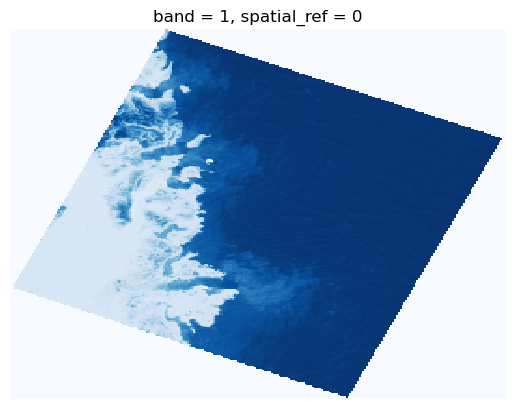

In [71]:
import rioxarray as rio

ds = rio.open_rasterio(selected_item.assets["blue"].href, overview_level=4).squeeze()
img = ds.plot(cmap="Blues", add_colorbar=False)
img.axes.set_axis_off();

## Plot time-series

We can plot a time-series of cloud cover for our image collection. Not a particularly fascinating plot but quite impressive that we were able to do that without downloading an image. 

Text(0, 0.5, 'Cloud cover (%)')

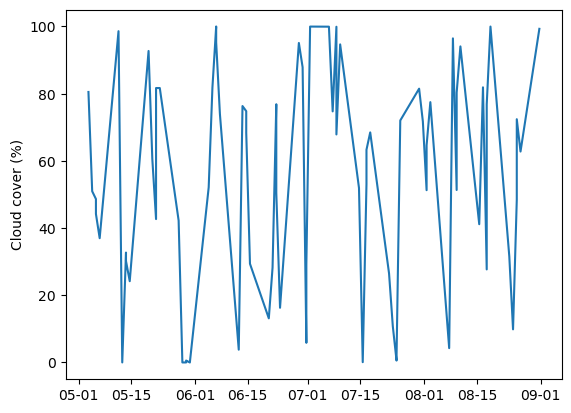

In [87]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df["datetime"] = pd.to_datetime(df["datetime"])
ts = df.set_index("datetime").sort_index()["eo:cloud_cover"]

fig, ax = plt.subplots()
ax.plot(ts.index, ts)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
plt.ylabel("Cloud cover (%)")

## API limits

So can access any data hosted on the internet using APIs? 

Often APIs are not freely available or have limitations. Tech companies (e.g. Zillow, Facebook, X) limit access to their APIs or provide APIs that have limited functionality with the argument that people would use the data for nefarious purposes. This is a problem because, by guarding data, they are also preventing it being used for good causes. Without access to their data it is difficult to tell whether they are in **compliance**. 

Either presented with subscription-based API

```{image} images/airbnb.png
:width: 1000px
:align: center
```

Or an API with limited functionality 

```{image} images/zestimate.png
:width: 1000px
:align: center
```

## Web scraping

* Since web pages are usually organized in a specfic way, we can sometimes still download data from them. 


* Web scraping (also known as crawling or harvesting) is the practice of **automatically** gathering data from the internet without the use of an **API**


* Most commonly accomplished by writing a program that **queries** a web server, **requests** data (usually in the form of HTML), and **parses** that data to extract information

```{image} images/inside_airbnb.png
:width: 1000px
:align: center
```

## Suppose a friend wanted to do this?

* `BeautifulSoup`: parses HTML, the format that web pages are written in


* `selenium`: launches and controls a web browser. The package is able to fill in forms and simulate mouse clicks in this browser.

## Selenium

* Sometimes we want even more control...


* Selenium is a package for performing **web browser automation**


* We can use Selenium to enter text in search boxes, click buttons etc. 


```{image} images/selenium.png
:width: 200px
:align: center
```

In [88]:
%%capture
# Install webdriver_manager: https://github.com/SergeyPirogov/webdriver_manager
!pip3 install webdriver_manager

In [89]:
# Import packages
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

In [90]:
# Install Chrome webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open a web browser at the following page
driver.get("https://www.google.com/maps")

```{image} images/google_maps.png
:width: 1000px
:align: center
```

```{image} images/inspect.png
:width: 1000px
:align: center
```


In [91]:
# Enter some text in the search box
inputElement = driver.find_element(By.ID, "searchboxinput")
inputElement.send_keys('South Sister Oregon')

```{image} images/enter_text.png
:width: 1000px
:align: center
```


In [92]:
# Click search button
element = driver.find_element(By.ID, "searchbox-searchbutton")
element.click()

```{image} images/search.png
:width: 900px
:align: center
```


## Acknowledgements

[Earth Data Analytics Online Certificate Chapter 15: APIs](https://earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/apis-in-python/)

[Reading Data from the STAC API](https://planetarycomputer.microsoft.com/docs/quickstarts/reading-stac/)

[Tutorial for Searching a STAC Catalog](https://hamedalemo.github.io/advanced-geo-python/lectures/11_earth_search_tutorial.html)